# Cabaran: Menganalisis Teks tentang Sains Data

> *Dalam buku nota ini, kita bereksperimen menggunakan URL yang berbeza - artikel Wikipedia tentang Pembelajaran Mesin. Anda boleh lihat bahawa, tidak seperti Sains Data, artikel ini mengandungi banyak istilah, yang menjadikan analisis lebih bermasalah. Kita perlu mencari cara lain untuk membersihkan data selepas melakukan pengekstrakan kata kunci, untuk menyingkirkan beberapa gabungan kata yang kerap tetapi tidak bermakna.*

Dalam contoh ini, mari kita lakukan latihan mudah yang merangkumi semua langkah dalam proses sains data tradisional. Anda tidak perlu menulis sebarang kod, anda hanya perlu klik pada sel di bawah untuk melaksanakannya dan memerhatikan hasilnya. Sebagai cabaran, anda digalakkan untuk mencuba kod ini dengan data yang berbeza.

## Matlamat

Dalam pelajaran ini, kita telah membincangkan pelbagai konsep berkaitan dengan Sains Data. Mari kita cuba menemui lebih banyak konsep berkaitan dengan melakukan **perlombongan teks**. Kita akan bermula dengan teks tentang Sains Data, mengekstrak kata kunci daripadanya, dan kemudian cuba memvisualisasikan hasilnya.

Sebagai teks, saya akan menggunakan halaman tentang Sains Data dari Wikipedia:


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## Langkah 1: Mendapatkan Data

Langkah pertama dalam setiap proses sains data adalah mendapatkan data. Kita akan menggunakan pustaka `requests` untuk melakukannya:


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## Langkah 2: Menukar Data

Langkah seterusnya adalah menukar data kepada bentuk yang sesuai untuk diproses. Dalam kes kita, kita telah memuat turun kod sumber HTML dari halaman tersebut, dan kita perlu menukarnya kepada teks biasa.

Terdapat banyak cara untuk melakukannya. Kita akan menggunakan objek [HTMLParser](https://docs.python.org/3/library/html.parser.html) bawaan paling mudah dari Python. Kita perlu mewarisi kelas `HTMLParser` dan mentakrifkan kod yang akan mengumpulkan semua teks di dalam tag HTML, kecuali tag `<script>` dan `<style>`.


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## Langkah 3: Mendapatkan Wawasan

Langkah yang paling penting adalah menukar data kita kepada bentuk yang membolehkan kita mendapatkan wawasan. Dalam kes kita, kita ingin mengekstrak kata kunci daripada teks dan melihat kata kunci mana yang lebih bermakna.

Kita akan menggunakan perpustakaan Python yang dipanggil [RAKE](https://github.com/aneesha/RAKE) untuk pengekstrakan kata kunci. Pertama, mari kita pasang perpustakaan ini sekiranya ia belum ada:


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Fungsi utama tersedia daripada objek `Rake`, yang boleh kita sesuaikan menggunakan beberapa parameter. Dalam kes kita, kita akan menetapkan panjang minimum kata kunci kepada 5 aksara, kekerapan minimum kata kunci dalam dokumen kepada 3, dan bilangan maksimum perkataan dalam kata kunci - kepada 2. Jangan ragu untuk mencuba nilai lain dan perhatikan hasilnya.


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

Kami memperoleh senarai istilah bersama dengan tahap kepentingan yang berkaitan. Seperti yang anda lihat, disiplin yang paling relevan, seperti pembelajaran mesin dan data besar, berada di kedudukan teratas dalam senarai.

## Langkah 4: Memvisualkan Hasil

Manusia dapat mentafsirkan data dengan lebih baik dalam bentuk visual. Oleh itu, sering kali masuk akal untuk memvisualkan data bagi mendapatkan beberapa pandangan. Kita boleh menggunakan perpustakaan `matplotlib` dalam Python untuk melukis taburan mudah kata kunci dengan kaitannya:


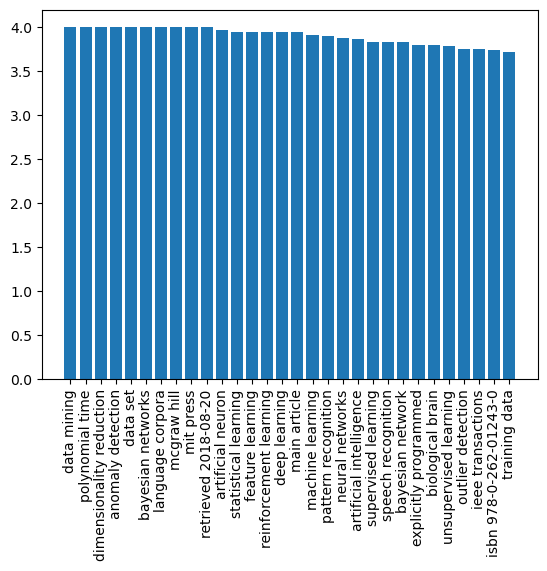

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

Terdapat, bagaimanapun, cara yang lebih baik untuk memvisualisasikan kekerapan perkataan - menggunakan **Word Cloud**. Kita perlu memasang satu lagi perpustakaan untuk melukis word cloud daripada senarai kata kunci kita.


In [71]:
!{sys.executable} -m pip install wordcloud

Objek `WordCloud` bertanggungjawab untuk mengambil sama ada teks asal, atau senarai perkataan yang telah dikira terlebih dahulu dengan kekerapan masing-masing, dan mengembalikan imej, yang kemudiannya boleh dipaparkan menggunakan `matplotlib`:


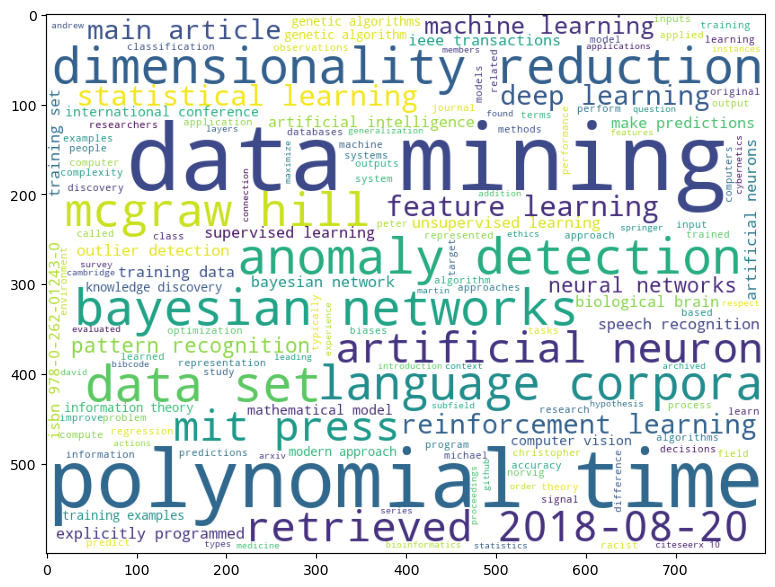

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

Kita juga boleh masukkan teks asal ke dalam `WordCloud` - mari kita lihat jika kita dapat hasil yang serupa:


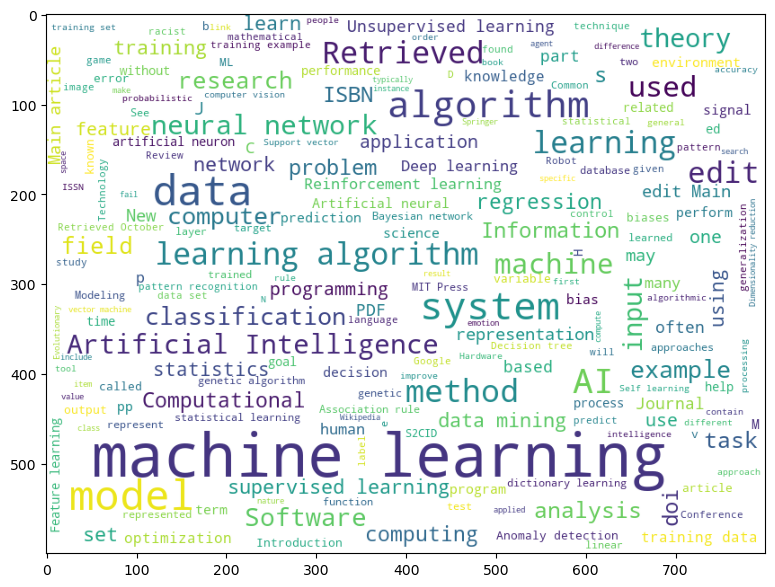

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Anda dapat melihat bahawa awan perkataan kini kelihatan lebih menarik, tetapi ia juga mengandungi banyak bunyi (contohnya, perkataan yang tidak berkaitan seperti `Retrieved on`). Selain itu, kita mendapat lebih sedikit kata kunci yang terdiri daripada dua perkataan, seperti *data scientist* atau *computer science*. Ini kerana algoritma RAKE melakukan tugas yang jauh lebih baik dalam memilih kata kunci yang berkualiti daripada teks. Contoh ini menggambarkan betapa pentingnya pra-pemprosesan dan pembersihan data, kerana gambaran yang jelas pada akhirnya akan membolehkan kita membuat keputusan yang lebih baik.

Dalam latihan ini, kita telah melalui proses mudah untuk mengekstrak beberapa makna daripada teks Wikipedia, dalam bentuk kata kunci dan awan perkataan. Contoh ini agak mudah, tetapi ia menunjukkan dengan baik semua langkah tipikal yang akan diambil oleh seorang saintis data semasa bekerja dengan data, bermula dari pemerolehan data hingga ke visualisasi.

Dalam kursus kita, kita akan membincangkan semua langkah tersebut dengan lebih terperinci.



---

**Penafian**:  
Dokumen ini telah diterjemahkan menggunakan perkhidmatan terjemahan AI [Co-op Translator](https://github.com/Azure/co-op-translator). Walaupun kami berusaha untuk memastikan ketepatan, sila ambil maklum bahawa terjemahan automatik mungkin mengandungi kesilapan atau ketidaktepatan. Dokumen asal dalam bahasa asalnya harus dianggap sebagai sumber yang berwibawa. Untuk maklumat penting, terjemahan manusia profesional adalah disyorkan. Kami tidak bertanggungjawab atas sebarang salah faham atau salah tafsir yang timbul daripada penggunaan terjemahan ini.
